
## Plotting using Seaborn

### Agenda/Topics:
- Modules/Tools come and go! Don't get stuck to tools.
- How to code using the Seaborn reference + Google
- https://seaborn.pydata.org/
- https://seaborn.pydata.org/api.html
- Go through some of the major plotting methods.
- Focus: code walkthrough,   code-composition, error messages

- NOTE: Seaborn is built on top of MatPlotLib to simplify plotting

### Pre-requisites:
- Plotting for Exploratory Data Anlaysis.
- Python Programming: course videos + live sessions




### Scatterplot

In [1]:
# source: https://seaborn.pydata.org/examples/scatter_bubbles.html
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset 
mpg = sns.load_dataset("mpg")
print(type(mpg))

<class 'pandas.core.frame.DataFrame'>


In [2]:
# pretty print DataFrame
# from tabulate import tabulate

# #Ref: https://pypi.org/project/tabulate/
# print(tabulate(mpg, headers='keys', tablefmt='github'))
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


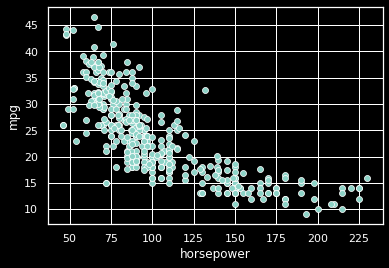

In [14]:
# Plot miles per gallon against horsepower

# Ref: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x="horsepower", y="mpg",  data=mpg)



# Conclusion = as horse power increses, fuel effiency decreases.

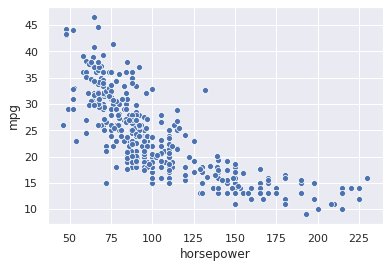

In [5]:
# GRID is very important for readability of a plot
sns.set(style="whitegrid")
sns.scatterplot(x="horsepower", y="mpg",  data=mpg)

Text(0.5, 1.0, 'SP')

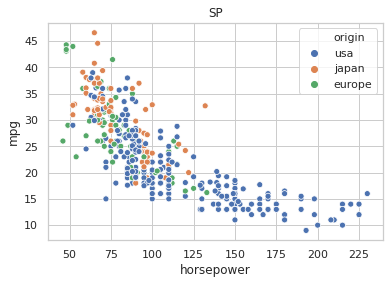

In [8]:
# different colored points for different countries/origin
sns.set(style="whitegrid")
sns.scatterplot(x="horsepower", y="mpg",  data=mpg, hue='origin').set_title('SP')

# Conclusion = faster us made cars and more fuel effiecient japanese cars

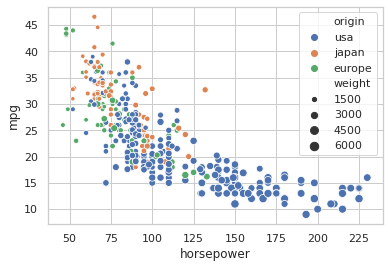

In [9]:
# size of each point proportional to the weight of car.
sns.set(style="whitegrid")
sns.scatterplot(x="horsepower", y="mpg",  data=mpg, hue='origin', size="weight")

# Conclusion = ?

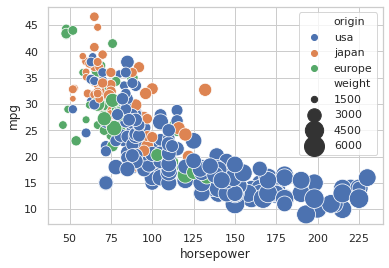

In [10]:
# custom-sizes for each bubble
# size of each point proportional to the weight of car.
sns.set(style="whitegrid")
sns.scatterplot(x="horsepower", y="mpg",  data=mpg, hue='origin', \
            size="weight", sizes = (40,400))


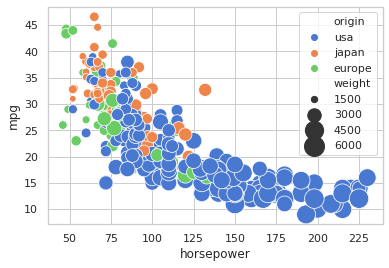

In [11]:
# Color-Pallette

#Ref: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

sns.set(style="whitegrid")
sns.scatterplot(x="horsepower", y="mpg",  data=mpg, hue='origin', \
            size="weight", sizes = (40,400), palette = 'muted')

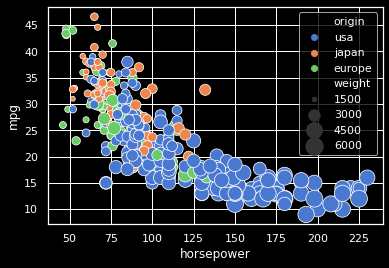

In [13]:
# dark-plot
# Google: " Searborn plot with dark background"
# https://gist.github.com/mwaskom/7be0963cc57f6c89f7b2

import matplotlib as plt

sns.set(style="whitegrid")
plt.style.use("dark_background") 

sns.scatterplot(x="horsepower", y="mpg",  data=mpg, hue='origin', \
            size="weight", sizes = (20,300),  palette = 'muted')

### FacetGrid
- Multi-plot grid for plotting conditional relationships.
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [27]:

#load data
from tabulate import tabulate
import seaborn as sns

tips = sns.load_dataset("tips")

#Ref: https://pypi.org/project/tabulate/
#print(tabulate(tips, headers='keys', tablefmt='github'))
print(tips.head(10))


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


<class 'seaborn.axisgrid.FacetGrid'>


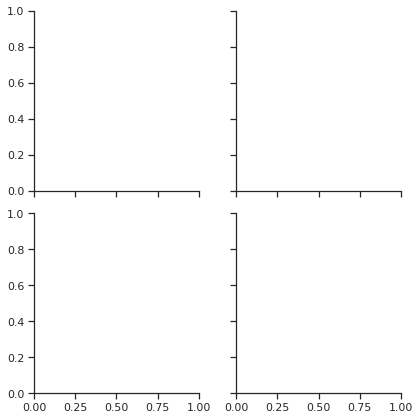

In [18]:
# Plot the data for 
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(tips, col="time", row="smoker") #time and smoker are categorical
print(type(g))

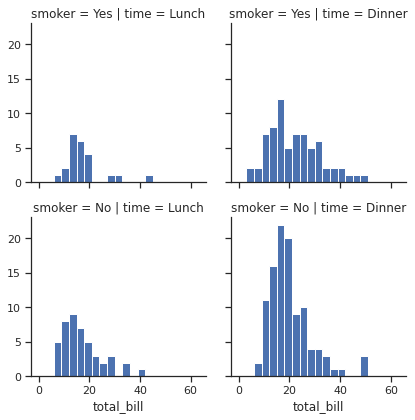

In [29]:
import numpy as np
import matplotlib.pyplot as plt
bins = np.arange(0, 65, 3)
g = sns.FacetGrid(tips, col="time",  row="smoker")
g.map(plt.hist, "total_bill", bins=bins)


#Conclusion?

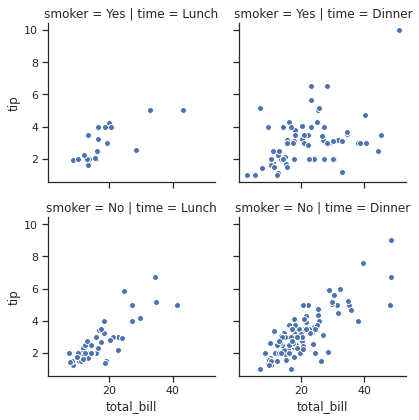

In [30]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w" )

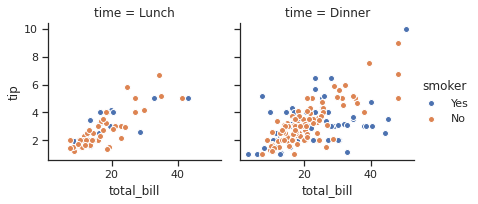

In [31]:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
#print(type(g.map(plt.scatter, "total_bill", "tip", edgecolor="w")))
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w")).add_legend()

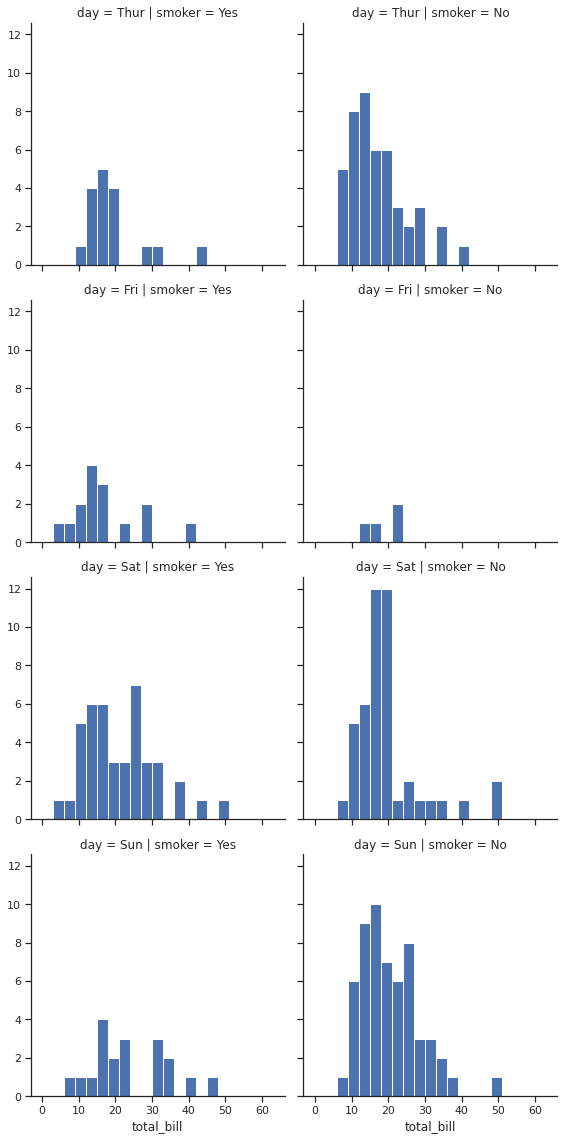

In [ ]:
import numpy as np

bins = np.arange(0, 65, 3)

g = sns.FacetGrid(tips, row="day",  col = "smoker" , height=4)
g = g.map(plt.hist, "total_bill", bins=bins)

In [35]:
att = sns.load_dataset("attention")
att.head()


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


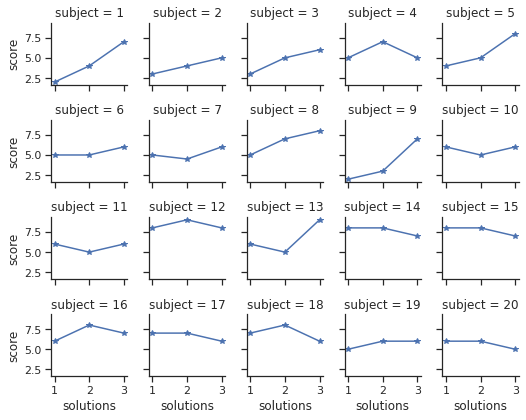

In [37]:
g = sns.FacetGrid(att, col="subject", col_wrap=5,height=1.5)
g = g.map(plt.plot, "solutions", "score", marker="*")

### **LinePlot**
- https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

In [38]:
import seaborn as sns
from tabulate import tabulate


sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


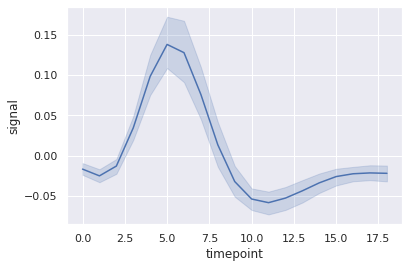

In [39]:
sns.lineplot(x="timepoint", y="signal", data=fmri)

In [40]:
np.mean(fmri[fmri["timepoint"] == 5]["signal"])

0.13772540199215538

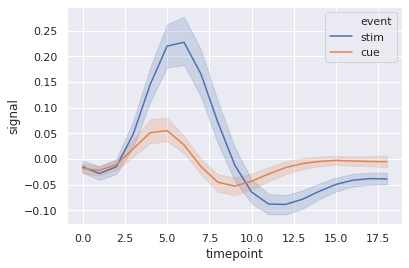

In [41]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

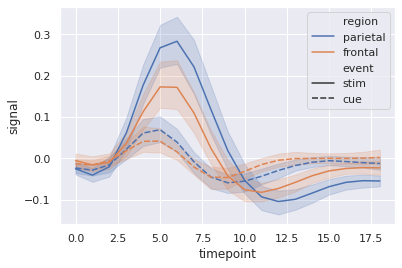

In [42]:
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="region", style="event", data=fmri)

|                     |           A |           B |
|---------------------|-------------|-------------|
| 2016-01-01 00:00:00 |  0.167921   |  0.523505   |
| 2016-01-02 00:00:00 |  0.817376   |  1.70385    |
| 2016-01-03 00:00:00 | -2.14695    |  0.714199   |
| 2016-01-04 00:00:00 | -0.760145   |  1.03942    |
| 2016-01-05 00:00:00 | -0.966452   | -0.143679   |
| 2016-01-06 00:00:00 |  1.57112    | -0.383279   |
| 2016-01-07 00:00:00 |  0.637999   | -0.344658   |
| 2016-01-08 00:00:00 | -0.00428237 |  0.158359   |
| 2016-01-09 00:00:00 | -0.963094   | -0.416057   |
| 2016-01-10 00:00:00 |  0.243013   |  0.348203   |
| 2016-01-11 00:00:00 | -0.0596562  |  1.51973    |
| 2016-01-12 00:00:00 | -1.36638    |  0.144781   |
| 2016-01-13 00:00:00 | -0.174122   | -0.280819   |
| 2016-01-14 00:00:00 | -0.907424   | -0.702973   |
| 2016-01-15 00:00:00 |  0.207336   | -0.326958   |
| 2016-01-16 00:00:00 |  1.16626    | -0.633555   |
| 2016-01-17 00:00:00 | -1.29998    |  0.0389803  |
| 2016-01-18

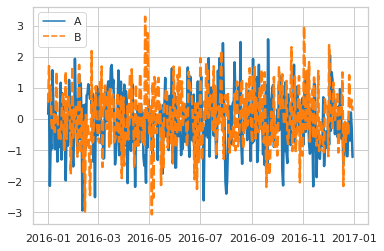

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 2)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B"])
 
print(tabulate(data, headers='keys', tablefmt='github'))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

### Distribution plots 
-
- distplot: https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot
- kdeplot:
- jointplot:

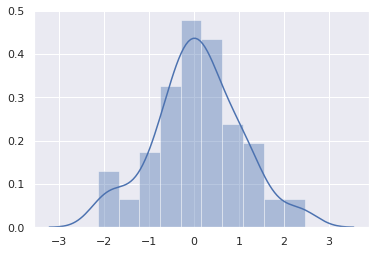

In [43]:
import seaborn as sns, numpy as np
sns.set(); 
np.random.seed(10)
x = np.random.randn(100)
sns.distplot(x)

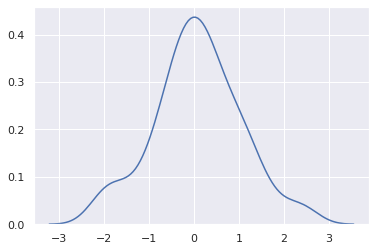

In [44]:
import numpy as np; 
import seaborn as sns; 
np.random.seed(10)


x = np.random.randn(100)
ax = sns.kdeplot(x)

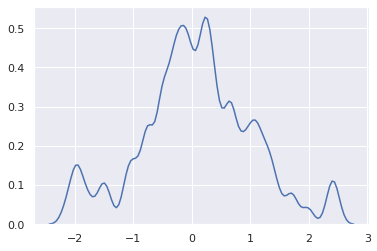

In [ ]:
ax = sns.kdeplot(x, bw=.1)

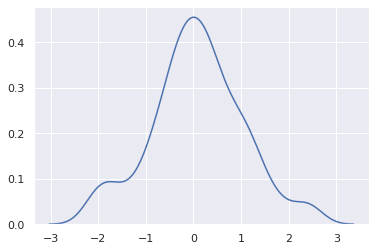

In [45]:
ax = sns.kdeplot(x, bw=.3)

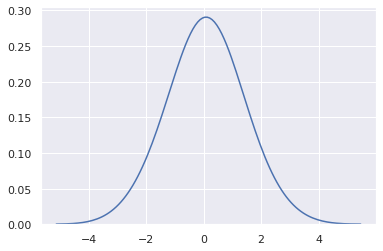

In [46]:
ax = sns.kdeplot(x, bw=1)

In [47]:
#JointPlot
#https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
tips = sns.load_dataset("tips")
print(tabulate(tips, headers='keys', tablefmt='github'))



|     |   total_bill |   tip | sex    | smoker   | day   | time   |   size |
|-----|--------------|-------|--------|----------|-------|--------|--------|
|   0 |        16.99 |  1.01 | Female | No       | Sun   | Dinner |      2 |
|   1 |        10.34 |  1.66 | Male   | No       | Sun   | Dinner |      3 |
|   2 |        21.01 |  3.5  | Male   | No       | Sun   | Dinner |      3 |
|   3 |        23.68 |  3.31 | Male   | No       | Sun   | Dinner |      2 |
|   4 |        24.59 |  3.61 | Female | No       | Sun   | Dinner |      4 |
|   5 |        25.29 |  4.71 | Male   | No       | Sun   | Dinner |      4 |
|   6 |         8.77 |  2    | Male   | No       | Sun   | Dinner |      2 |
|   7 |        26.88 |  3.12 | Male   | No       | Sun   | Dinner |      4 |
|   8 |        15.04 |  1.96 | Male   | No       | Sun   | Dinner |      2 |
|   9 |        14.78 |  3.23 | Male   | No       | Sun   | Dinner |      2 |
|  10 |        10.27 |  1.71 | Male   | No       | Sun   | Dinner |      2 |

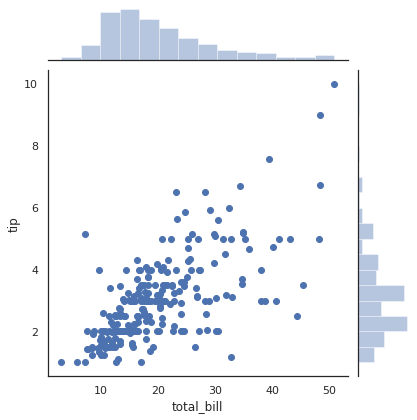

In [48]:
g = sns.jointplot(x="total_bill", y="tip", data=tips)

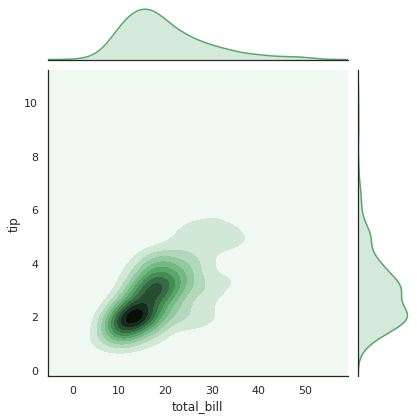

In [49]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde", color='g')

<class 'seaborn.axisgrid.JointGrid'>


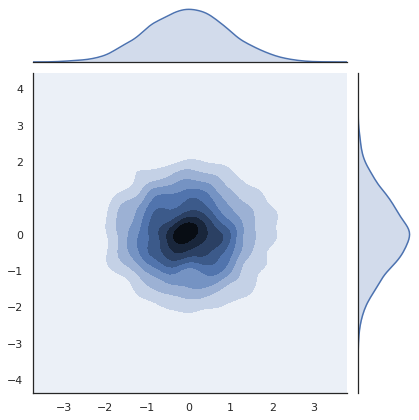

In [51]:
x, y = np.random.randn(2, 3000)

print(type(sns.jointplot(x, y, kind="kde")))

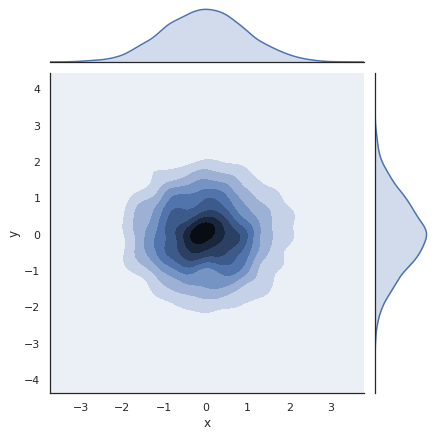

In [52]:
g = (sns.jointplot(x, y, kind="kde").set_axis_labels("x", "y"))